In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import 

In [7]:
def equation_to_fit(x, Vmax, Kd):
    return (Vmax * x) / (Kd + x)

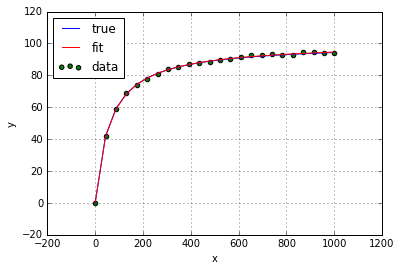

[ 100.41428894   61.36553205]
[ 0.20501064  0.82109441]


In [10]:
x_data = np.linspace(0, 1000, 24)
y_truedata = equation_to_fit(x_data, 100, 60)

'''Create some noise and add it to the y values to represent experimental data'''
y_noise = 0.5 * np.random.normal(size = x_data.size)
y_experimental = y_truedata + y_noise

'''Return the fitted paramaters and their covariance for the fitted curve'''
init_guess = [1,1]
low_bounds = [0,0]
up_bounds = [1000, 1000]
fit_params, covar_params = curve_fit(equation_to_fit, x_data, y_experimental, p0 = init_guess, bounds=(low_bounds, up_bounds)) 
std_dev_error_of_fit_params = np.sqrt(np.diag(covar_params))

plt.plot(x_data, y_truedata, c='b', label='true')
plt.scatter(x_data, y_experimental, c='g', label='data')
plt.plot(x_data, equation_to_fit(x_data, *fit_params), c='r', label='fit')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best')
plt.grid()
plt.show()
print(fit_params)
print(std_dev_error_of_fit_params)